# 6 CB Supervised Machine Learning

### This script contains the following points
#### 01 Import Libraries
#### 02 Import Data
#### 03 First Look at Data
#### 04 Data Wrangling and Cleaning
#### 05 Visual Exploration
#### 06 Data Prep for Regression Analysis
#### 07 Regression Analysis

# 01 Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 02 Import Data

In [2]:
# Set a path

path = r'C:\Users\Tina\Desktop\CareerFoundry\Data Analytics Immersion\Chocolate Bar Rating'

In [3]:
# Import "checked_chocolate_bars"

choco_check = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'checked_chocolate_bars.csv'))

# 03 First Look at Data

In [4]:
# Shape of "choco_check"

choco_check.shape

(1722, 10)

In [5]:
# First few rows of "choco_check"

choco_check.head()

,Unnamed: 0,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


In [6]:
# Drop "Unnamed: 0" column

choco_check = choco_check.drop(columns =['Unnamed: 0'])

In [7]:
choco_check.head()

,company,bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


# 04 Data Wrangling and Cleaning

Data has already been wrangled and cleaned.

# 05 Visual Exploration

C:\Users\Tina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, "Relationship between Chocolate Bars' Amount of Cocoa and their Ratings")

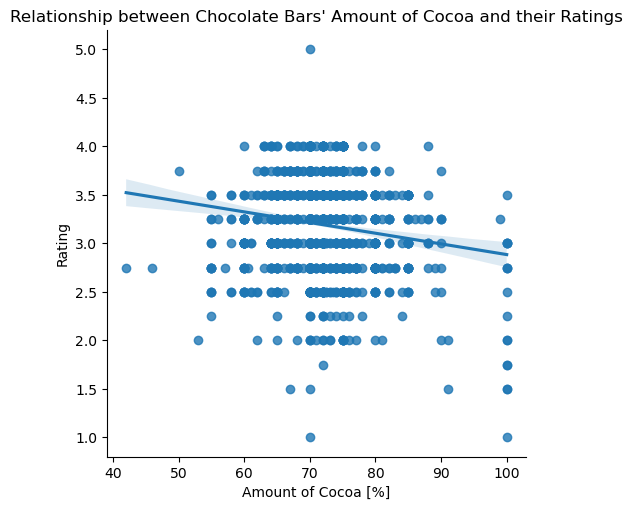

In [16]:
# Create a scatterplot of "cocoa_percent" and 'rating'

sns.lmplot(x = 'cocoa_percent', y = 'rating', data = choco_check)
plt.xlabel("Amount of Cocoa [%]")
plt.ylabel("Rating")
plt.title("Relationship between Chocolate Bars' Amount of Cocoa and their Ratings")

There is no real trend that can be observed with these two variabels, but for the sake of this exercise I will formulate the hypothesis:

##### If the amount of cocoa in a chocolate bar goes up, the chocolate bar's rating goes down.

# 06 Data Prep for Regression Analysis

In [9]:
# Reshape the variables into arrays and put them into separate objects

X = choco_check['cocoa_percent'].values.reshape(-1,1)
y = choco_check['rating'].values.reshape(-1,1)

In [10]:
# Create a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 07 Regression Analysis

In [11]:
# Create a regression object

regression = LinearRegression()

In [12]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using the test set

y_predicted = regression.predict(X_test)

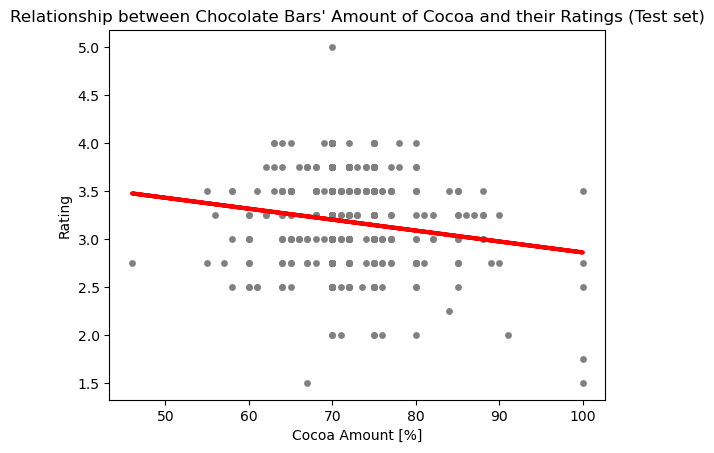

In [14]:
# Create a plot with the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title("Relationship between Chocolate Bars' Amount of Cocoa and their Ratings (Test set)")
plot_test.xlabel('Cocoa Amount [%]')
plot_test.ylabel('Rating')
plot_test.show()

Like already visible in the scatterplot above, there is no real trend here and therefore the line does not fit the data very well.

In [28]:
# Create model summary statistics

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01139256]]
Mean squared error:  0.20683978634825295
R2 score:  0.00817610402905955


The model has a mean squared error of 0.21 which is very low and from this value alone it seems like the model is a good fit. The R2 score, however, has a value of 0.0082 which is also very low, but in this case it means that this model isn't a good fit for this data set.

In [25]:
# Comparing the actual and predicted values of y

y_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
y_compare.head(30)

,Actual,Predicted
0,3.00,3.200784
1,3.25,3.177999
2,3.50,3.200784
3,3.25,3.200784
4,3.00,3.143821
5,2.50,3.269139
6,2.50,3.143821
7,2.75,3.143821
8,2.75,3.177999
9,3.00,3.177999


Some of the predicted y values are very close to the actual values, while others are far away. This is due to the fact that some data points are close to the line while others are far from it.

The model follows the same "trend" as the scatterplot above but it doesn't actually fit the data set very well and therefore it cannot be used to make any predictions on a chocolate bar's rating based on its cocoa content. The data points would need to show some form of linear trend for it to be usable for a model.

Taste is subjective and is not easily predictable. Maybe it would be possible to predict if all the ratings came from the same person and the only difference in the chocolate bars was the cocoa content. This would create a controlled environment that would make it easier to make predictions on how this specific person would rate a chocolate bar based on the cocoa content. But not knowing all the other factors that might have influenced these ratings, it is not possible to make predictions based on the data alone.